Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

# What provide Numpy to Python ?

- `ndarray` multi-dimensional array object
- derived objects such as masket arrays and matrices
- `ufunc` fast array mathematical operations.
- Offers some Matlab-ish capabilities within Python
- Initially developed by [Travis Oliphant](https://www.continuum.io/people/travis-oliphant).
- Numpy 1.0 released October, 2006.
- The [SciPy.org website](https://docs.scipy.org/doc/numpy) is very helpful.
- NumPy fully supports an object-oriented approach.
- Routines for fast operations on arrays.
    - shape manipulation
    - sorting
    - I/O
    - FFT
    - basic linear algebra
    - basic statistical operations
    - random simulation and much more.


# Getting Started with NumPy
- Install numpy with conda using shell command in a terminal:

```bash
$ conda install numpy
```

- It is handy to import everything from NumPy into a Python console:
```python
from numpy import *
```
- But it is easier to read and debug if you use explicit imports.


In [1]:
import numpy as np
print(np.__version__)

1.13.1


To find all reading functions in numpy, ask ipython's tab completion:

In [2]:
#np.nd<TAB>

In [3]:
print(np.ndarray.__doc__)

ndarray(shape, dtype=float, buffer=None, offset=0,
            strides=None, order=None)

    An array object represents a multidimensional, homogeneous array
    of fixed-size items.  An associated data-type object describes the
    format of each element in the array (its byte-order, how many bytes it
    occupies in memory, whether it is an integer, a floating point number,
    or something else, etc.)

    Arrays should be constructed using `array`, `zeros` or `empty` (refer
    to the See Also section below).  The parameters given here refer to
    a low-level method (`ndarray(...)`) for instantiating an array.

    For more information, refer to the `numpy` module and examine the
    methods and attributes of an array.

    Parameters
    ----------
    (for the __new__ method; see Notes below)

    shape : tuple of ints
        Shape of created array.
    dtype : data-type, optional
        Any object that can be interpreted as a numpy data type.
    buffer : object exposing buf

# Why Arrays ?

- Python lists are slow to process and use a lot of memory.
- For tables, matrices, or volumetric data, you need lists of lists of lists... which becomes messy to program.

In [4]:
from random import random
from operator import truediv

l1 = [random() for i in range(1000)]
l2 = [random() for i in range(1000)]
a1 = np.array(l1)
a2 = np.array(l2)


In [5]:
%timeit s = sum(map(truediv,l1,l2))

70.5 µs ± 2.2 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [6]:
%timeit s = np.sum(a1/a2)

7.51 µs ± 137 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


# Numpy Arrays: The `ndarray` class.

- There are important differences between NumPy arrays and Python lists:
    - NumPy arrays have a fixed size at creation.
    - NumPy arrays elements are all required to be of the same data type.
    - NumPy arrays operations are performed in compiled code for performance.
- Most of today's scientific/mathematical Python-based software use NumPy arrays.
- NumPy gives us the code simplicity of Python, but the operation is speedily executed by pre-compiled C code.

In [7]:
a = np.array([0,1,2,3])
b = np.array((4,5,6,7))

In [8]:
a,b

(array([0, 1, 2, 3]), array([4, 5, 6, 7]))

## element-by-element operations are the “default mode” 

In [9]:
a*b

array([ 0,  5, 12, 21])

In [10]:
a@b     # Matrix multiplication

38

In [11]:
5*a

array([ 0,  5, 10, 15])

#  NumPy Arrays Properties

In [12]:
a = np.array([1,2,3,4,5]) # Simple array creation

In [13]:
type(a) # Checking the type

numpy.ndarray

In [14]:
a.dtype # Print numeric type of elements

dtype('int32')

In [15]:
a.itemsize # Print Bytes per element

4

In [16]:
a.shape # returns a tuple listing the length along each dimension

(5,)

In [17]:
np.size(a), a.size # returns the entire number of elements.

(5, 5)

In [18]:
a.ndim  # Number of dimensions

1

In [19]:
a.nbytes # Memory used

20

- ** Always use `shape` or `size` for numpy arrays instead of `len` **
- `len` gives same information only for 1d array.

# Functions to allocate arrays

In [20]:
x = np.zeros((2,),dtype=('i4,f4,a10'))
x

array([(0,  0., b''), (0,  0., b'')],
      dtype=[('f0', '<i4'), ('f1', '<f4'), ('f2', 'S10')])

`empty, empty_like, ones, ones_like, zeros, zeros_like`

In [21]:
n = 5
a = np.zeros(n*n,dtype=np.double).reshape(n,n)
b = np.zeros((n,n),dtype=np.double)
a == b

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]], dtype=bool)

#  Setting Array Elements Values

In [22]:
a = np.array([1,2,3,4,5])
print(a.dtype)

int32


In [23]:
a[0] = 10 # Change first item value
a, a.dtype

(array([10,  2,  3,  4,  5]), dtype('int32'))

In [24]:
a.fill(0) # slighty faster than a[:] = 0
a

array([0, 0, 0, 0, 0])

# Setting Array Elements Types

In [25]:
b = np.array([1,2,3,4,5.0]) # Last item is a float
b, b.dtype

(array([ 1.,  2.,  3.,  4.,  5.]), dtype('float64'))

In [26]:
a.fill(3.0)  # assigning a float into a int array 
a[1] = 1.5   # truncates the decimal part
print(a.dtype, a)

int32 [3 1 3 3 3]


In [27]:
a.astype('float64') # returns a new array containing doubles

array([ 3.,  1.,  3.,  3.,  3.])

In [28]:
np.asfarray([1,2,3,4]) # Return an array converted to a float type

array([ 1.,  2.,  3.,  4.])

# Slicing x[lower:upper:step]
- Extracts a portion of a sequence by specifying a lower and upper bound.
- The lower-bound element is included, but the upper-bound element is **not** included.
- The default step value is 1 and can be negative.

In [29]:
a = np.array([10,11,12,13,14])
a[1:3]

array([11, 12])

In [30]:
a[1:-2], a[-4:3]

(array([11, 12]), array([11, 12]))

In [31]:
a[:3]  # First three elements

array([10, 11, 12])

In [32]:
a[-2:]   # Last two elements

array([13, 14])

In [33]:
a[::2], a[::-1]

(array([10, 12, 14]), array([14, 13, 12, 11, 10]))

# Example: Compute derivative of $\sin(x)$

In [34]:
x = np.linspace(0,4*np.pi,40)
y = np.sin(x)

In [35]:
dy = y[1:]-y[:-1]
dx = x[1:]-x[:-1]
dy_dx = dy / dx

# derivatives values are centered in-between sample points
centers_x = 0.5*(x[1:]+x[:-1]) 

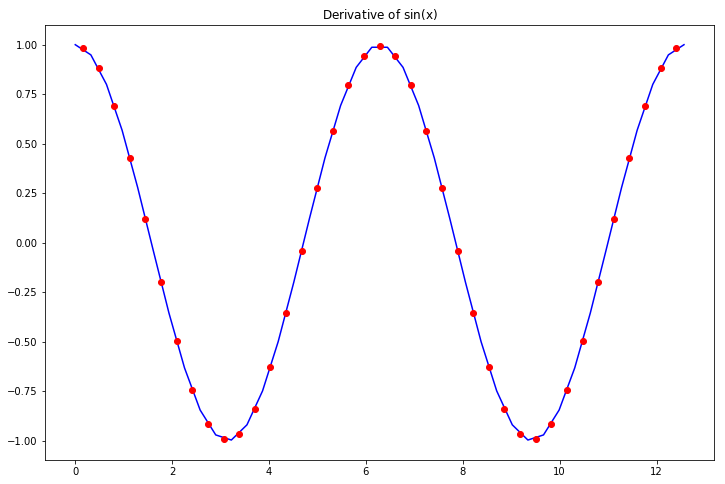

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12.,8.] # Increase plot size
plt.plot(x, np.cos(x),'b', centers_x, dy_dx,'ro')
plt.title(r"$\rm{Derivative\ of}\ \sin(x)$");

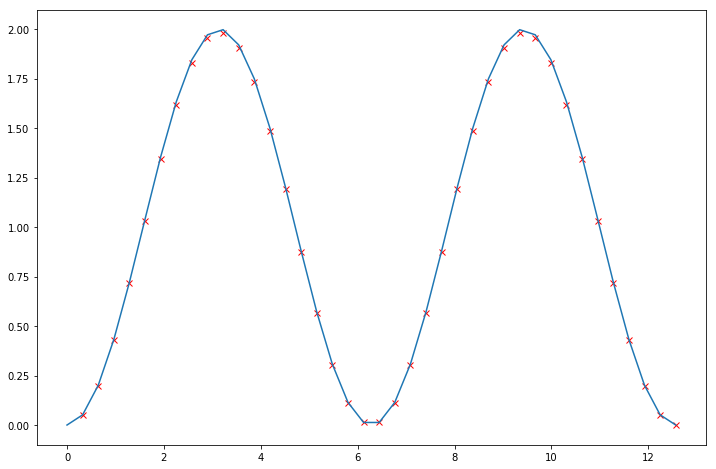

In [39]:
avg_height = 0.5*(y[1:]+y[:-1])
int_sin = np.cumsum(dx*avg_height)
plt.plot(x[1:], int_sin, 'rx', x, np.cos(0)-np.cos(x))

# Multidimensional array

In [42]:
r = np.arange(4*3).reshape(4,3) # NumPy array

In [43]:
l = [[0,1,2],[3,4,5],[6,7,8],[9,10,11]] # Python List

In [44]:
r

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [45]:
l[-1][-1] # Access to last item

11

In [46]:
r[-1,-1]  # Indexing syntax is different with NumPy array

11

In [51]:
r[0,0] # returns the first item

0

In [52]:
r[1,:] # returns the second line

array([3, 4, 5])

In [53]:
r[1] # second line with 2d array

array([3, 4, 5])

In [54]:
r[:,-1]  # last column

array([ 2,  5,  8, 11])

# Arrays to ASCII files

In [55]:
x = y = z = np.arange(0.0,5.0,1.0)

In [56]:
np.savetxt('test.out', x, delimiter=',')   # X is an array
!cat test.out

0.000000000000000000e+00
1.000000000000000000e+00
2.000000000000000000e+00
3.000000000000000000e+00
4.000000000000000000e+00


In [49]:
np.savetxt('test.out', (x,y,z))   # x,y,z equal sized 1D arrays
!cat test.out

0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00
0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00
0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00 3.000000000000000000e+00 4.000000000000000000e+00


In [50]:
np.savetxt('test.out', x, fmt='%1.4e')   # use exponential notation
!cat test.out

0.0000e+00
1.0000e+00
2.0000e+00
3.0000e+00
4.0000e+00


# Arrays from ASCII files

In [51]:
np.loadtxt('test.out')

array([ 0.,  1.,  2.,  3.,  4.])

In [52]:
from io import StringIO   # StringIO behaves like a file object
c = StringIO("0 1\n2 3")
np.loadtxt(c)

array([[ 0.,  1.],
       [ 2.,  3.]])

In [53]:
c = StringIO("1,0,2\n3,0,4")
x, y = np.loadtxt(c, delimiter=',', usecols=(0, 2), unpack=True)
x, y

(array([ 1.,  3.]), array([ 2.,  4.]))

# Slices Are References
- Slices are references to memory in the original array.
- Changing values in a slice also changes the original array.


In [54]:
a = np.arange(10)
b = a[3:6]
b

array([3, 4, 5])

In [55]:
b[0] = -1
a

array([ 0,  1,  2, -1,  4,  5,  6,  7,  8,  9])

- Numpy does not copy if it is not necessary to save memory.

In [56]:
c = a[7:8].copy() # Explicit copy of the array slice
c[0] = -1
a

array([ 0,  1,  2, -1,  4,  5,  6,  7,  8,  9])

# Fancy Indexing

In [57]:
a = np.fromfunction(lambda i, j: (i+1)*10+j, (4, 5), dtype=int)
a

array([[10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [58]:
np.random.shuffle(a.flat) # shuffle modify only the first axis
a

array([[24, 42, 40, 33, 23],
       [13, 14, 11, 10, 31],
       [12, 21, 32, 44, 30],
       [41, 22, 43, 34, 20]])

In [59]:
locations = a % 3 == 0
a[locations] = 0 #set to 0 only the values that are divisible by 3
a

array([[ 0,  0, 40,  0, 23],
       [13, 14, 11, 10, 31],
       [ 0,  0, 32, 44,  0],
       [41, 22, 43, 34, 20]])

# Changing array shape

In [60]:
grid = np.indices((2,3)) # Return an array representing the indices of a grid.
grid[0]

array([[0, 0, 0],
       [1, 1, 1]])

In [61]:
grid[1]

array([[0, 1, 2],
       [0, 1, 2]])

In [62]:
grid.flat[:] # Return a view of grid array

array([0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2])

In [63]:
grid.flatten() # Return a copy

array([0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2])

In [64]:
np.ravel(grid, order='C') # A copy is made only if needed.

array([0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2])

# Sorting

In [65]:
a=np.array([5,3,6,1,6,7,9,0,8])
np.sort(a) #. Return a view

array([0, 1, 3, 5, 6, 6, 7, 8, 9])

In [66]:
a

array([5, 3, 6, 1, 6, 7, 9, 0, 8])

In [67]:
a.sort() # Change the array inplace
a

array([0, 1, 3, 5, 6, 6, 7, 8, 9])

# Transpose-like operations

In [68]:
a = np.array([5,3,6,1,6,7,9,0,8])
b = a
b.shape = (3,3) # b is a reference so a will be changed

In [69]:
a

array([[5, 3, 6],
       [1, 6, 7],
       [9, 0, 8]])

In [70]:
c = a.T # Return a view so a is not changed

In [71]:
c[0,0] = -1 # c is stored in same memory so change c you change a
a

array([[-1,  3,  6],
       [ 1,  6,  7],
       [ 9,  0,  8]])

In [72]:
c  # is a transposed view of a

array([[-1,  1,  9],
       [ 3,  6,  0],
       [ 6,  7,  8]])

In [73]:
b  # b is a reference to a

array([[-1,  3,  6],
       [ 1,  6,  7],
       [ 9,  0,  8]])

In [74]:
c.base  # When the array is not a view `base` return None

array([[-1,  3,  6],
       [ 1,  6,  7],
       [ 9,  0,  8]])

# Methods Attached to NumPy Arrays

In [75]:
a = np.arange(20).reshape(4,5)
np.random.shuffle(a.flat)
a

array([[19,  9, 18, 16,  1],
       [ 3, 11, 13, 17,  2],
       [12, 14,  8,  0,  4],
       [ 6,  5, 10,  7, 15]])

In [76]:
a = (a - a.mean())/ a.std() # Standardize the matrix
print(a)

[[ 1.64750894 -0.086711    1.47408695  1.12724296 -1.47408695]
 [-1.12724296  0.26013299  0.60697698  1.30066495 -1.30066495]
 [ 0.43355498  0.78039897 -0.26013299 -1.64750894 -0.95382097]
 [-0.60697698 -0.78039897  0.086711   -0.43355498  0.95382097]]


In [77]:
np.set_printoptions(precision=4)
print(a)

[[ 1.6475 -0.0867  1.4741  1.1272 -1.4741]
 [-1.1272  0.2601  0.607   1.3007 -1.3007]
 [ 0.4336  0.7804 -0.2601 -1.6475 -0.9538]
 [-0.607  -0.7804  0.0867 -0.4336  0.9538]]


In [78]:
a.argmax() # max position in the memory contiguous array

0

In [79]:
np.unravel_index(a.argmax(),a.shape) # get position in the matrix

(0, 0)

# Array Operations over a given axis

In [80]:
a = np.arange(20).reshape(5,4)
np.random.shuffle(a.flat)

In [81]:
a.sum(axis=0) # sum of each column

array([52, 41, 43, 54])

In [82]:
np.apply_along_axis(sum, axis=0, arr=a)

array([52, 41, 43, 54])

In [83]:
np.apply_along_axis(sorted, axis=0, arr=a)

array([[ 5,  0,  2,  1],
       [ 9,  4,  3,  7],
       [11,  6,  8, 10],
       [12, 13, 14, 17],
       [15, 18, 16, 19]])

You can replace the `sorted` builtin fonction by a user defined function.

In [84]:
np.empty(10)

array([  0.0000e+000,  -2.0039e+000,   2.4703e-323,   0.0000e+000,
         0.0000e+000,   0.0000e+000,   0.0000e+000,  -4.3375e-311,
         9.8813e-324,   6.9534e-309])

In [85]:
np.linspace(0,2*np.pi,10)

array([ 0.    ,  0.6981,  1.3963,  2.0944,  2.7925,  3.4907,  4.1888,
        4.8869,  5.5851,  6.2832])

In [86]:
np.arange(0,2.+0.4,0.4)

array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ])

In [87]:
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [88]:
a = np.diag(range(4))
a

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3]])

In [89]:
a[:,:,np.newaxis]

array([[[0],
        [0],
        [0],
        [0]],

       [[0],
        [1],
        [0],
        [0]],

       [[0],
        [0],
        [2],
        [0]],

       [[0],
        [0],
        [0],
        [3]]])

* Create the following arrays
```python
[100 101 102 103 104 105 106 107 108 109]
```
Hint: numpy.arange
```python
[-2. -1.8 -1.6 -1.4 -1.2 -1. -0.8 -0.6 -0.4 -0.2 0. 
0.2 0.4 0.6 0.8 1. 1.2 1.4 1.6 1.8]
```
Hint: numpy.linspace
```python
[[ 0.001	0.00129155 0.0016681 0.00215443 0.00278256 
     0.003593810.00464159 0.00599484 0.00774264 0.01]
```
Hint: numpy.logspace
```python
[[ 0. 0. -1. -1. -1.] 
 [ 0. 0.  0. -1.  1.] 
 [ 0. 0.  0.  0. -1.]
 [ 0. 0.  0.  0.  0.]
 [ 0. 0.  0.  0.  0.] 
 [ 0. 0.  0.  0.  0.] 
 [ 0. 0.  0.  0.  0.]]
```
Hint: numpy.tri, numpy.zeros, numpy.transpose

In [1]:
np.set_printoptions(precision=4)

print(np.arange(100,110))
print(np.arange(-2,2,0.2))
print(np.linspace(-2,2,num=20))

print(np.logspace(-3,-2,num=10))
print(- np.tri(5,7,-2).T)

NameError: name 'np' is not defined

```python
[[ 0.  1.  2.  3. 4.] 
 [-1.  0.  1.  2. 3.] 
 [-1. -1.  0.  1. 2.] 
 [-1. -1. -1.  0. 1.] 
 [-1. -1. -1. -1. 0.]]
```
Hint: numpy.ones, numpy.diag


In [15]:
import numpy as np
a = - np.tri(5,5,-1)
for i in range(1,5):
    a += np.tri(5,5,-i).transpose()
a

array([[ 0.,  1.,  2.,  3.,  4.],
       [-1.,  0.,  1.,  2.,  3.],
       [-1., -1.,  0.,  1.,  2.],
       [-1., -1., -1.,  0.,  1.],
       [-1., -1., -1., -1.,  0.]])

In [ ]:
def trapz(f,a,b,n):
    x,dx = np.linspace()


* Compute the integral numerically with Trapezoidal rule
$$
I = \int_{-\infty}^\infty e^{-v^2} dv
$$
with  $v \in [-10;10]$ and n=20.



# Views and Memory Management
- If it exists one view of a NumPy array, it can be destroyed.


In [90]:
big = np.arange(1000000)
small = big[:5]
del big
small.base

array([     0,      1,      2, ..., 999997, 999998, 999999])

- Array called `big` is still allocated.
- Sometimes it is better to create a copy.

In [91]:
big = np.arange(1000000)
small = big[:5].copy()
del big
print(small.base)

None


In [96]:
a = np.arange(20)
b = a.reshape(5,4)
b = np.asfortranarray(a)

In [97]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

In [98]:
b.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  UPDATEIFCOPY : False

`asfortranarray` makes a copy

In [95]:
b.base is a

False

You can also create a fortran array with array function.

In [96]:
c = np.array([[1,2,3],[4,5,6]])
f = np.asfortranarray(c)

In [97]:
print(f.ravel(order='K')) # Return a 1D array using memory order
print(c.ravel(order='K')) # Copy is made only if necessary

[1 4 2 5 3 6]
[1 2 3 4 5 6]


# Fast Evaluation Of Array Expressions 

- The `numexpr` package supplies routines for the fast evaluation of array expressions elementwise by using a vector-based virtual machine.
- Expressions are cached, so reuse is fast.

In [98]:
import numexpr
a = np.random.rand(1000000)
b = np.arange(1000000)

In [99]:
%timeit res = 3 * a * a - 5 * b

7.01 ms ± 684 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [100]:
%timeit res = numexpr.evaluate("3*a**2-5.*b");

4.11 ms ± 123 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


[Numexpr Users Guide](https://github.com/pydata/numexpr/wiki/Numexpr-Users-Guide)

# Numpy Matrix

Specialized 2-D array that retains its 2-D nature through operations. It has certain special operators, such as $*$ (matrix multiplication) and $**$ (matrix power).

In [101]:
m = np.matrix('1 2; 3 4') #Matlab syntax
m

matrix([[1, 2],
        [3, 4]])

In [102]:
a = np.matrix([[1, 2],[ 3, 4]]) #Python syntax
a

matrix([[1, 2],
        [3, 4]])

In [103]:
b = np.mat(np.arange(1,3)) # 2D view, no copy!
b

matrix([[1, 2]])

In [104]:
a * b.T

matrix([[ 5],
        [11]])

In [105]:
m * a # Matrix multiplication

matrix([[ 7, 10],
        [15, 22]])

# NumPy Array Programming
- Array operations are fast, Python loops are slow. 
- Top priority: **avoid loops**
- It’s better to do the work three times witharray operations than once with a loop.
- This does require a change of habits.
- This does require some experience.
- NumPy’s array operations are designed to make this possible.